In [17]:
import json

with open('config.json', 'r') as f:
    config = json.load(f)

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [3]:
df_news = pd.read_csv(config["PREPROCESSED_SPACY_ITEMS"])

In [4]:
df_news.head()

,Unnamed: 0,page,url,issued,modified,title,body,caption,cleaned_body,cleaned_title,cleaned_caption,combined_text
0,0,7371a9b5-5824-4c57-8704-00a74feebe79,http://g1.globo.com/al/alagoas/noticia/2018/09...,2018-09-13 14:52:55+00:00,2018-09-14 16:14:49+00:00,Corpo de motorista da Uber é encontrado em can...,Corpo de motorista de aplicativo desaparecido ...,"Segundo a polícia, Antônio Vitor foi solicitad...",corpo motorista aplicativo desaparecido encont...,corpo motorista uber encontrado canavial rotei...,polícia antônio vitor solicitado corridas desa...,corpo motorista uber encontrado canavial rotei...
1,1,7a5ea08f-4583-49e2-ba52-a71999443f7b,http://g1.globo.com/am/amazonas/noticia/detent...,2018-05-20 20:42:40+00:00,2018-05-20 20:42:40+00:00,Detento recapturado após fuga por túnel volta ...,Detento disse que passou nome falso ao dar ent...,Ele tinha registro em presídio com nome falso....,detento disse passou nome falso entrada presíd...,detento recapturado fuga túnel volta cdpm manaus,tinha registro presídio nome falso presos esca...,detento recapturado fuga túnel volta cdpm mana...
2,2,6afc8bbb-4f36-43d5-8a44-a2917df5621a,http://g1.globo.com/ap/amapa/noticia/audios-mo...,2017-07-30 00:37:17+00:00,2017-07-30 00:48:42+00:00,Áudios mostram conversa entre bandidos durante...,Áudios mostram possível conversa entre bandido...,Revista realizada na sexta-feira (28) no Iapen...,áudios mostram conversa bandidos tentativa fug...,áudios mostram conversa bandidos durante tenta...,revista realizada iapen apreendeu celulares dr...,áudios mostram conversa bandidos durante tenta...
3,3,5cc3bd27-80c7-457d-a807-2e8e7fddf031,http://g1.globo.com/ap/amapa/noticia/2020/11/0...,2020-11-06 12:54:00+00:00,2020-11-12 21:22:52+00:00,FOTOS: Apagão no Amapá,"Moradores da capital do Amapá, em Macapá, faze...",Incêndio em subestação de energia deixa 13 dos...,moradores capital amapá macapá protestos maksu...,fotos apagão amapá,incêndio subestação energia deixa municípios e...,fotos apagão amapá incêndio subestação energia...
4,4,d6956177-db96-42f5-9f68-dd0d6e930661,http://g1.globo.com/ap/amapa/noticia/2019/05/2...,2019-05-27 13:43:03+00:00,2019-05-27 18:19:06+00:00,Profissionais da educação no AP paralisam ativ...,Profissionais da educação paralisam atividades...,Ato comprometeu aulas em escolas nesta segunda...,profissionais educação paralisam atividades re...,profissionais educação ap paralisam atividades...,ato comprometeu aulas escolas sinsepeap seed n...,profissionais educação ap paralisam atividades...


In [5]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_news["combined_text"])

In [6]:
# Apply K-Means clustering 
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

#score 0.01 demorou quase 1hr

Silhouette Score: 0.00


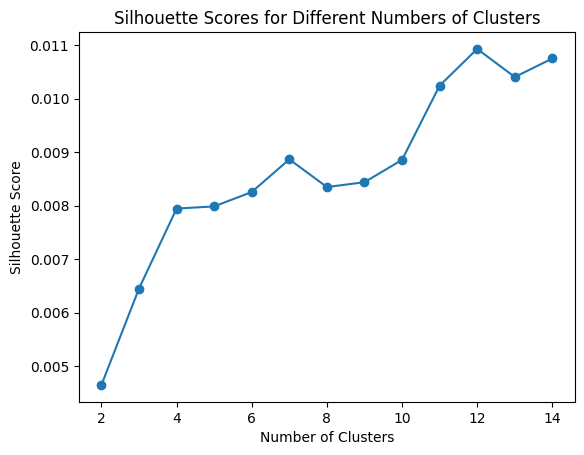

In [7]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


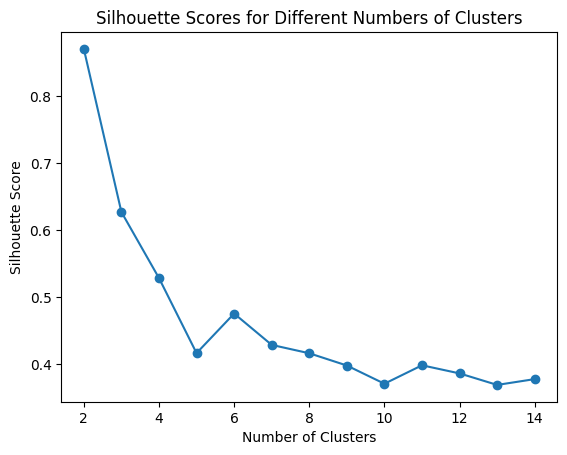

In [8]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Silhouette Score: 0.87


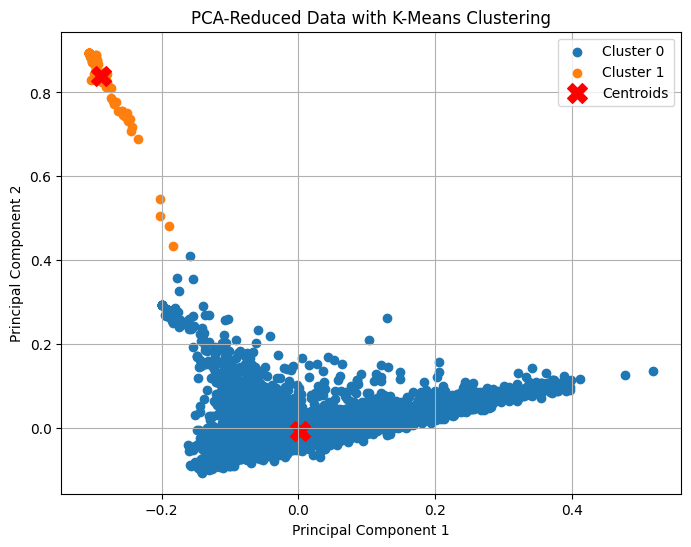

In [9]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot PCA-reduced data with K-Means cluster assignments
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )
    
# Mark cluster centers
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title("PCA-Reduced Data with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [10]:
df_news['cluster'] = cluster_labels

In [11]:
# Count words

def count_words(x:str)->int:
    return len(str(x).split())

df_news['word_count'] = df_news['body'].apply(count_words)

In [12]:
# Save clusters and their tags into a .txt file

with open(config["CLUSTER_FEATURES_TXT"], "w") as file:
    for cluster in range(num_clusters):
        file.write(f"\nCluster {cluster}:\n")
        cluster_texts = df_news[df_news['cluster'] == cluster]['title']
        file.write(f"{cluster_texts.tolist()}\n")

In [18]:
df_news.to_csv(config["DF_ITEMS_CLUSTERED_FEATURES"])